In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv", sep=",", header=0, index_col=0)




In [121]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Goncalves, Mr. Manuel Estanslas",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [108]:
train.shape

(891, 11)

In [109]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [110]:
train.dropna(inplace=True)

In [40]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [111]:
train.shape

(183, 11)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train['Age']=train['Age'].fillna(train['Age']).median()
train['Age'].isnull().sum()

train.Age.fillna(value=data.Age.mean(), inplace=True)
train.Fare.fillna(value=data.Fare.mean(), inplace=True)
train.Embarked.fillna(value=(data.Embarked.value_counts().idxmax()), inplace=True)

--------------------------------------------------------------------------------------------------------------------

In [113]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

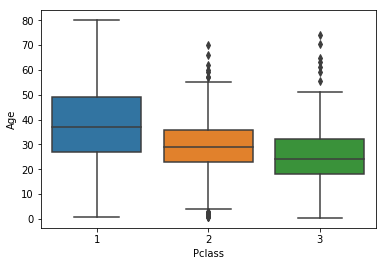

In [114]:
sns.boxplot(x='Pclass',y='Age',data=train)

from above figure, we can try to input missing age by class                                              
Pclass 1, Age average approximately = 37                                                       
Pclass 2, Age average approximately = 29                                  
Pclass 3, Age average approximately = 24                                          

In [116]:
def fill_age_train(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [118]:
train['Age'] = train[['Age','Pclass']].apply(fill_age_train,axis=1)


In [119]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [84]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
train['Embarked'].fillna('S',inplace=True)
train['Cabin'].fillna('No Cabin',inplace=True)

In [ ]:
df.drop('Name',axis=1,inplace=True)
df.head()

In [120]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

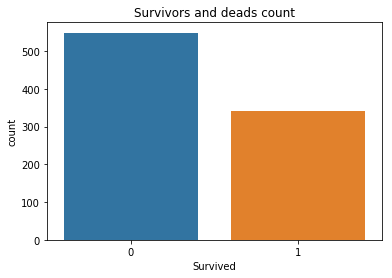

In [86]:
g = sns.countplot(x=train['Survived']).set_title('Survivors and deads count')


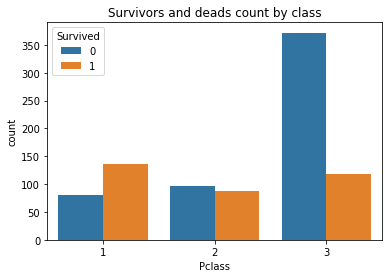

In [87]:

a = sns.countplot(x='Pclass', hue='Survived', data=train).set_title('Survivors and deads count by class')



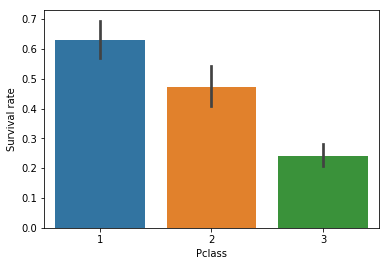

In [88]:
b = sns.barplot(x='Pclass', y='Survived', data=train).set_ylabel('Survival rate')

Text(0, 0.5, 'Survival rate')

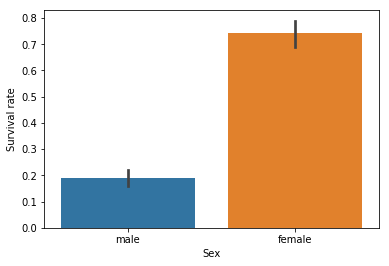

In [89]:
sns.barplot(x='Sex', y='Survived', data=train).set_ylabel('Survival rate')

In [90]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

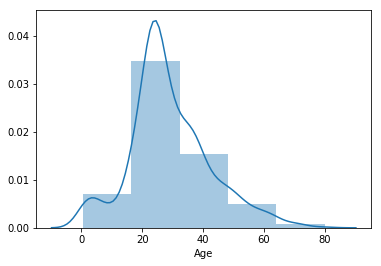

In [91]:
sns.distplot(train['Age'],bins=5)


In [ ]:
'child'=0
'young adult'=1
'adult'=2
'old'=3
'senior'=4

In [93]:
train['AgeGroup'] = train['Age']
train.loc[train['AgeGroup']<=19, 'AgeGroup'] = 0
train.loc[(train['AgeGroup']>19) & (train['AgeGroup']<=30), 'AgeGroup'] = 1
train.loc[(train['AgeGroup']>30) & (train['AgeGroup']<=45), 'AgeGroup'] = 2
train.loc[(train['AgeGroup']>45) & (train['AgeGroup']<=63), 'AgeGroup'] = 3
train.loc[train['AgeGroup']>63, 'AgeGroup'] = 4

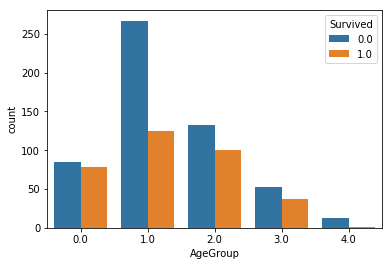

In [94]:
sns.countplot(x='AgeGroup',hue='Survived',data=train)


In [95]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 #himself
train['IsAlone'] = 0
train.loc[train['FamilySize']==1, 'IsAlone'] = 1

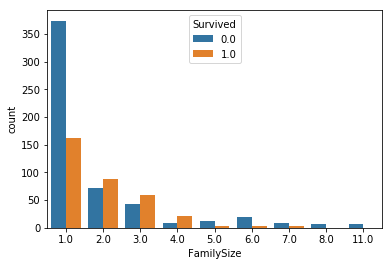

In [96]:
sns.countplot(x='FamilySize',hue='Survived',data=train)


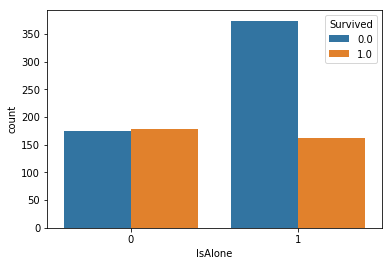

In [97]:
sns.countplot(x='IsAlone',hue='Survived',data=train)


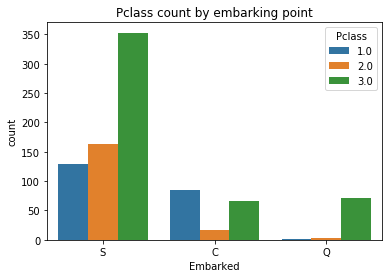

In [98]:
g = sns.countplot(data=train, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

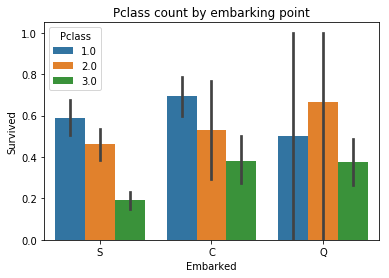

In [99]:
g = sns.barplot(data=train, x='Embarked',y='Survived', hue='Pclass').set_title('Pclass count by embarking point')

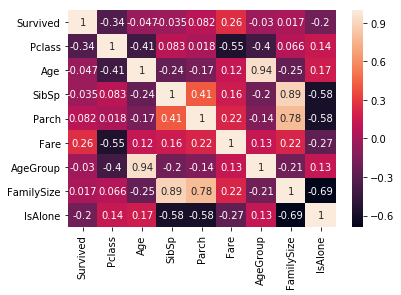

In [103]:

sns.heatmap(train.corr() ,annot=True)

In [123]:
train.drop(['Parch', 'SibSp', 'Age','Cabin'], axis=1, inplace=True)


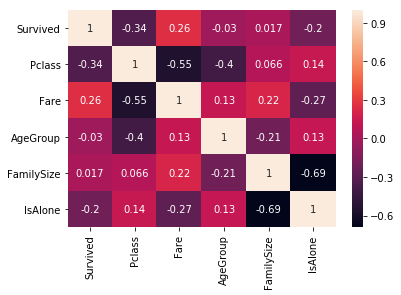

In [105]:

sns.heatmap(train.corr() ,annot=True)

In [124]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare', 'Embarked'], dtype='object')

In [125]:
train.shape

(891, 7)